### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.patches as mpatches

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [113]:
data = pd.read_csv('data/coupons.csv')

In [114]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [115]:
# check count
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

car column only contains 108 non NaN values. To preserve the majority of records, we will replace the NaN values with unknown. The only rows that we will remove from the data set are those with values 'do not drive' since the main goal of the studay it sto check the coupon acceptance on different driving situation.

2. Investigate the dataset for missing or problematic data.

In [116]:
# Check which columns contain NaN values
data.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [117]:
# For each column with NaN, check unique values to get a sense of the data
data.car.unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [118]:
data.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

We'll assume that nan, never, and less1 are respondents that don't go to bars

In [119]:
data.CoffeeHouse.unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

Just like in Bar, nan, never, and less1 will be equal to 0. The same transformation will be applied to CarryAway, RestaurantLessThan20, Restaurant20To50

In [120]:
data.CarryAway.unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [121]:
data.RestaurantLessThan20.unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [122]:
data.Restaurant20To50.unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [123]:
# replace rows with NaN in car with unknown and assign to cleandata
cleandata = data.fillna('unknown')

In [124]:
# remove entries where car = 'do not drive'
cleandata = cleandata.query("car != 'do not drive'")

In [125]:
# tbd
cleandata.income.unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [126]:
# perform transformations on Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, age, income and convert to numeric values 

cleandata['Bar'] = cleandata['Bar'].fillna(0)
cleandata['CoffeeHouse'] = cleandata['CoffeeHouse'].fillna(0)
cleandata['RestaurantLessThan20'] = cleandata['RestaurantLessThan20'].fillna(0)
cleandata['Restaurant20To50'] = cleandata['Restaurant20To50'].fillna(0)

conv_to_numeric = {'Bar': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'CoffeeHouse': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'CarryAway': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'RestaurantLessThan20': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'Restaurant20To50': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'age': {'50plus': 51, 'below21': 20},
                    'income': {'$37500 - $49999': 37500, '$62500 - $74999': 62500, '$12500 - $24999': 12500, '$75000 - $87499': 75000, '$50000 - $62499': 50000, '$25000 - $37499': 25000, '$100000 or More': 100001, '$87500 - $99999': 87500, 'Less than $12500': 12499}}

numericdata=cleandata.replace(conv_to_numeric)

4. What proportion of the total observations chose to accept the coupon? 



In [127]:
# using groupby check total rows with Y = 0 or Y = 1
numericdata.groupby('Y').size().reset_index(name='Coupon Respondence')

,Y,Coupon Respondence
0,0,5462
1,1,7200


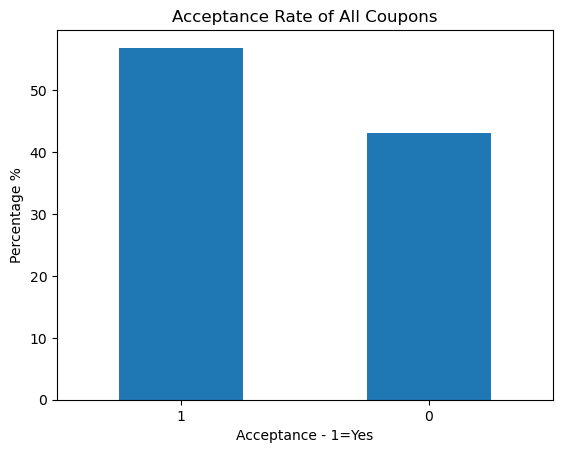

In [128]:
general_acceptance = numericdata['Y'].value_counts(normalize=True).mul(100).round(2)
general_acceptance.plot(kind = 'bar', rot=0)
plt.xlabel ('Acceptance - 1=Yes')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate of All Coupons')
plt.savefig('images/acceptance_rate_all.png')
plt.show ()


In [129]:
general_acceptance

Y
1    56.86
0    43.14
Name: proportion, dtype: float64

56.86% of the total obsevations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

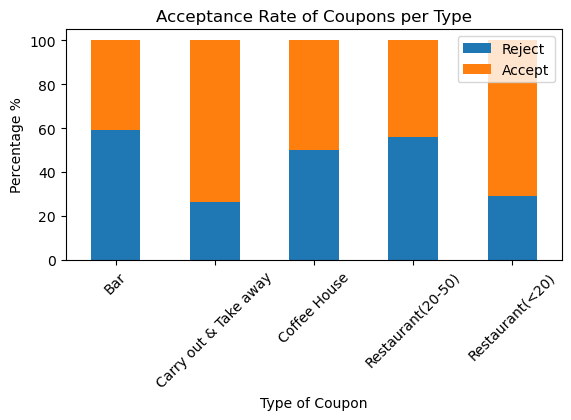

Y,0,1
coupon,,
Bar,59.06,40.94
Carry out & Take away,26.45,73.55
Coffee House,49.99,50.01
Restaurant(20-50),55.98,44.02
Restaurant(<20),29.23,70.77


In [130]:
bardf = numericdata.groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
bardf.plot(kind = 'bar', stacked = True, rot=45)
plt.xlabel ('Type of Coupon')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate of Coupons per Type')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_coupons.png')
plt.show ()

bardf

6. Use a histogram to visualize the temperature column.

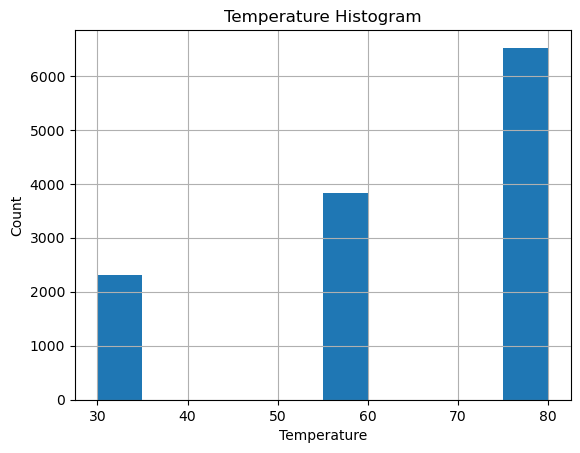

In [131]:
numericdata.hist(column='temperature')
plt.xlabel ('Temperature')
plt.ylabel ('Count')
plt.title ('Temperature Histogram')
#plt.subplots_adjust(bottom=0.4)
plt.savefig('images/temperature_histogram.png')
plt.show ()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [132]:
# create df where coupon == 'Bar'
barcoupon = numericdata.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [133]:
# remove unknown
barcoupon = barcoupon.query("Bar != 'unknown'")
barcoupon = barcoupon.query("RestaurantLessThan20 != 'unknown'")
barcoupon = barcoupon.query("income != 'unknown'")
barcoupon = barcoupon.query("age != 'unknown'")

In [134]:
# convert string columns to int
barcoupon['Bar'] = barcoupon['Bar'].astype(int)
barcoupon['age'] = barcoupon['age'].astype(int)
barcoupon['RestaurantLessThan20'] = barcoupon['RestaurantLessThan20'].astype(int)
barcoupon['income'] = barcoupon['income'].astype(int)

In [135]:
barcoupon.groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()

Y,0,1
coupon,,
Bar,59.09,40.91


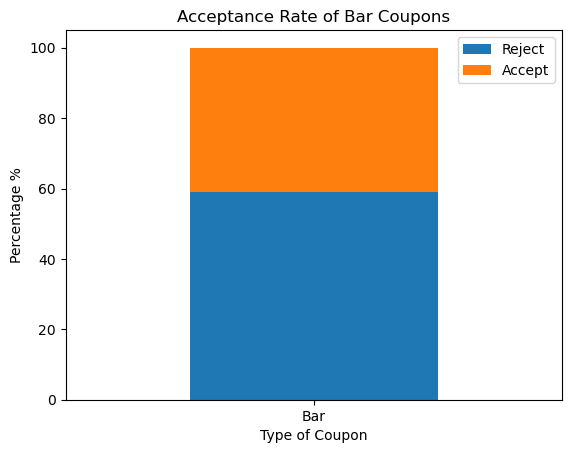

In [136]:
#barcoupon.groupby('Y').size()
singlescenariodf = barcoupon.groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
singlescenariodf.plot(kind = 'bar', stacked = True, rot=0)
plt.xlabel ('Type of Coupon')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate of Bar Coupons')
plt.legend(['Reject','Accept'])
#plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_barcoupons.png')
plt.show ()

In [137]:
singlescenariodf

Y,0,1
coupon,,
Bar,59.09,40.91


Acceptance rate of bar coupons is 40.91%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [138]:
# assign to a new df for this scenario
scenariodf = barcoupon.groupby('Bar')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()

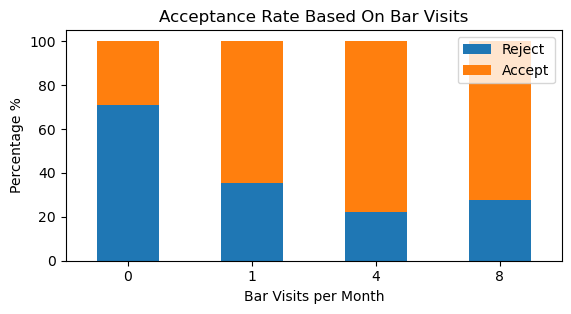

Y,0,1
Bar,,
0,71.00,29.00
1,35.26,64.74
4,22.00,78.00
8,27.66,72.34


In [139]:
#testdf = numericdata.groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf.plot(kind = 'bar', stacked = True, rot=0)
plt.xlabel ('Bar Visits per Month')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate Based On Bar Visits')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_barvisits.png')
plt.show ()

scenariodf

Acceptance rate is higher for people that goes to bar more than 3 times per month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


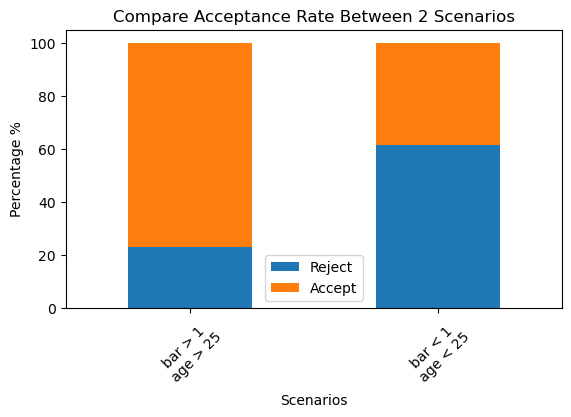

In [140]:

scenariodf1 =  barcoupon.query("Bar > 1").query("age > 25 ").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf1['scenario'] = 'bar > 1\n age > 25'

scenariodf2 =  barcoupon.query("Bar < 1").query("age < 25 ").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf2['scenario'] = 'bar < 1\n age < 25'

combined = pd.concat([scenariodf1,scenariodf2])
combined = combined[['scenario',0,1]]
combined = combined.set_index('scenario')
combined.plot(kind = 'bar', stacked = True, rot=45)

plt.xlabel ('Scenarios')
plt.ylabel ('Percentage %')
plt.title ('Compare Acceptance Rate Between 2 Scenarios')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.3)
plt.savefig('images/acceptance_rate_barscene1.png')
plt.show ()

The acceptance rate is higher when bar > 1 and age > 25

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


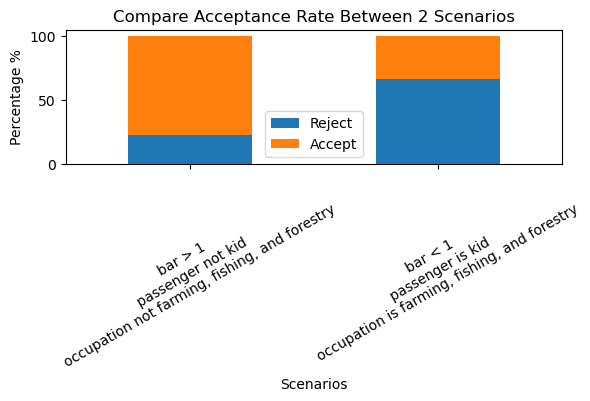

In [141]:


scenariodf4 = barcoupon.query("Bar > 1").query("passanger != 'Kid(s)'").query("occupation != 'Farming Fishing & Forestry'").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf4['scenario'] = 'bar > 1\n passenger not kid\n occupation not farming, fishing, and forestry'
scenariodf5 = barcoupon.query("Bar < 1").query("passanger == 'Kid(s)'").query("occupation == 'Farming Fishing & Forestry'").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf5['scenario'] = 'bar < 1\n passenger is kid\n occupation is farming, fishing, and forestry'

combined = pd.concat([scenariodf4,scenariodf5])
combined = combined[['scenario',0,1]]
combined = combined.set_index('scenario')
combined.plot(kind = 'bar', stacked = True, rot=30)

plt.xlabel ('Scenarios')
plt.ylabel ('Percentage %')
plt.title ('Compare Acceptance Rate Between 2 Scenarios')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.6)
plt.savefig('images/acceptance_rate_barscene2.png')
plt.show ()

The acceptance rate is higher for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



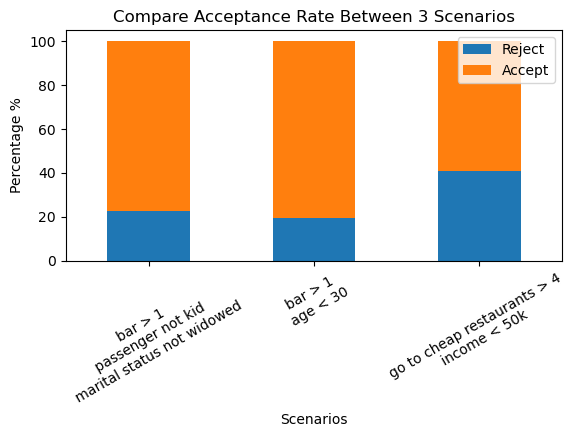

In [142]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

scenariodf6 = barcoupon.query("Bar > 1").query("passanger != 'Kid(s)'").query("maritalStatus != 'Widowed'").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf6['scenario'] = 'bar > 1\n passenger not kid\n marital status not widowed'
scenariodf7 = barcoupon.query("Bar > 1").query("age < 30").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf7['scenario'] = 'bar > 1\n age < 30'
scenariodf8 = barcoupon.query("RestaurantLessThan20 > 4").query("income < 50000").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
scenariodf8['scenario'] = 'go to cheap restaurants > 4\n income < 50k'

combined = pd.concat([scenariodf6,scenariodf7,scenariodf8])
combined = combined[['scenario',0,1]]
combined = combined.set_index('scenario')
combined.plot(kind = 'bar', stacked = True, rot=30)

plt.xlabel ('Scenarios')
plt.ylabel ('Percentage %')
plt.title ('Compare Acceptance Rate Between 3 Scenarios')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_barscene3.png')
plt.show ()

Based on the graph, the highest acceptance rate is when drivers go to the bars more than 1 per month and are older than 40.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the different analysis, the acceptance rate increases when the driver goes to bars for more than 1 per month. 

To increase the chances of bar coupons being accepted by drivers, they should be given when the following conditions are present:
- goes to bar for more than 1 per month
- does not have a kid as a passenger
- income is more than 50k
- age is older than 25
- occupation is not farming, fishing, or forrestry

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [143]:
# create df where coupon == 'Bar'
coffeecoupon = numericdata.query("coupon == 'Coffee House'")

# remove unknown
coffeecoupon = coffeecoupon.query("Bar != 'unknown'")
coffeecoupon = coffeecoupon.query("RestaurantLessThan20 != 'unknown'")
coffeecoupon = coffeecoupon.query("Restaurant20To50 != 'unknown'")
coffeecoupon = coffeecoupon.query("age != 'unknown'")

# convert string columns to int so that sort/compare operations will work 
coffeecoupon['age'] = coffeecoupon['age'].astype(int)
coffeecoupon['RestaurantLessThan20'] = coffeecoupon['RestaurantLessThan20'].astype(int)
coffeecoupon['Restaurant20To50'] = coffeecoupon['Restaurant20To50'].astype(int)
coffeecoupon['Bar'] = coffeecoupon['Bar'].astype(int)

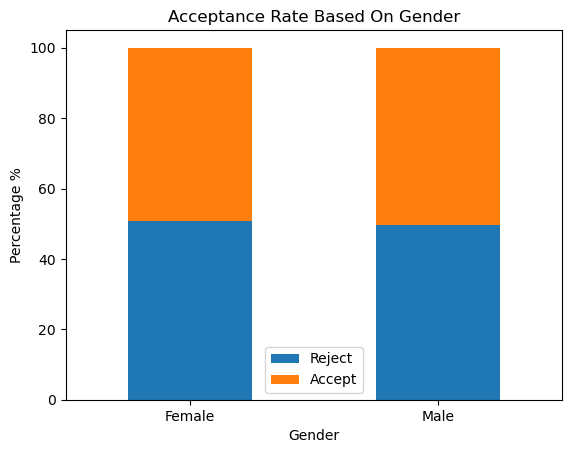

Y,0,1
gender,,
Female,50.73,49.27
Male,49.63,50.37


In [144]:
# check acceptance of coupon between male and female

# assign to a new df for this scenario
coffeescenariodf = coffeecoupon.groupby('gender')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()

coffeescenariodf.plot(kind = 'bar', stacked = True, rot=0)
plt.xlabel ('Gender')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate Based On Gender')
plt.legend(['Reject','Accept'])
#plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_coffeegender.png')
plt.show ()

coffeescenariodf

There's no significant difference on the acceptance rate between male and female. 

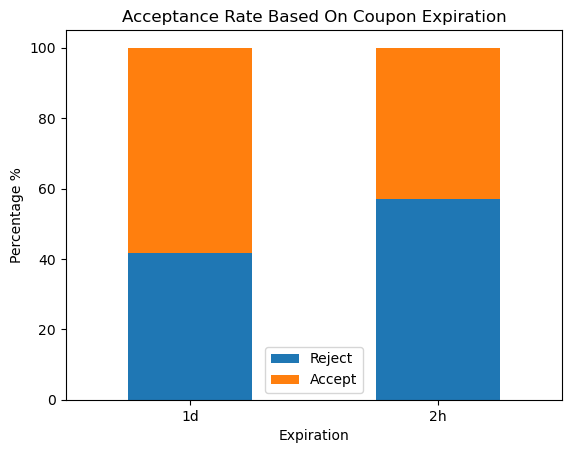

Y,0,1
expiration,,
1d,41.68,58.32
2h,56.98,43.02


In [145]:
# check acceptance of coupon based on expiration

# assign to a new df for this scenario
coffeescenariodf1 = coffeecoupon.groupby('expiration')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()

coffeescenariodf1.plot(kind = 'bar', stacked = True, rot=0)
plt.xlabel ('Expiration')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate Based On Coupon Expiration')
plt.legend(['Reject','Accept'])
#plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_couponexpire.png')
plt.show ()

coffeescenariodf1

Acceptance of coffee coupon if expiration is 1d is slightly higher.

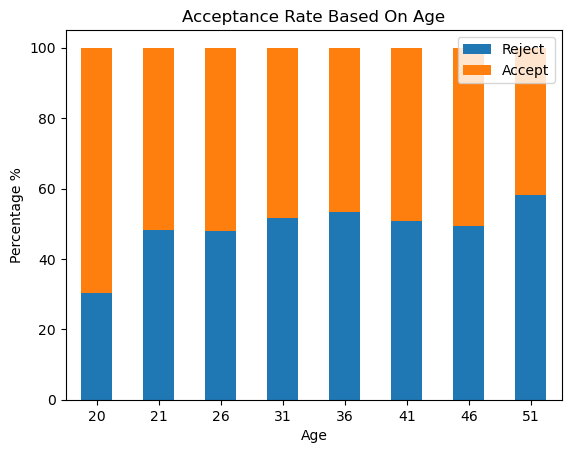

Y,0,1
age,,
20,30.46,69.54
21,48.32,51.68
26,48.00,52.00
31,51.62,48.38
36,53.42,46.58
41,50.79,49.21
46,49.31,50.69
51,58.24,41.76


In [146]:
# Check coffee coupon acceptance rate based on age
coffeescenariodf2 = coffeecoupon.groupby('age')['Y'].value_counts(normalize=True).mul(100).round(2).unstack().sort_values(by='age')

coffeescenariodf2.plot(kind = 'bar', stacked = True, rot=0)
plt.xlabel ('Age')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate Based On Age')
plt.legend(['Reject','Accept'])
#plt.subplots_adjust(bottom=0.4)
plt.savefig('images/acceptance_rate_age.png')
plt.show ()

coffeescenariodf2

The acceptance rate is highest when age is 20, 69.68%

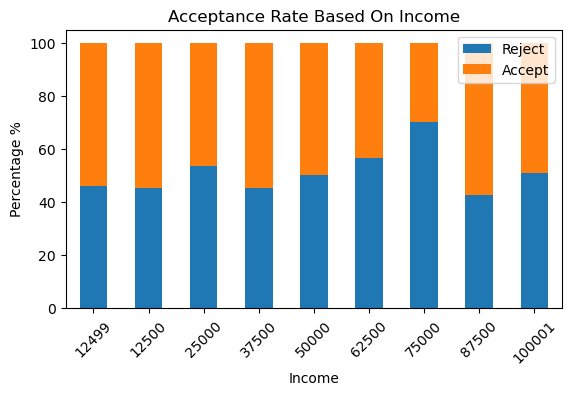

Y,0,1
income,,
12499,45.97,54.03
12500,45.27,54.73
25000,53.55,46.45
37500,45.39,54.61
50000,50.19,49.81
62500,56.46,43.54
75000,70.39,29.61
87500,42.64,57.36
100001,50.85,49.15


In [147]:
# check acceptance rate based on income
coffeescenariodf3 = coffeecoupon.groupby('income')['Y'].value_counts(normalize=True).mul(100).round(2).unstack().sort_values(by='income')

coffeescenariodf3.plot(kind = 'bar', stacked = True, rot=45)
plt.xlabel ('Income')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate Based On Income')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.3)
plt.savefig('images/acceptance_rate_income.png')
plt.show ()

coffeescenariodf3

Interestingly the acceptance rate for those earning less than 12500 per year (55.19%) is almost the same as those earning between 85000 - 100000 (57.20%). 

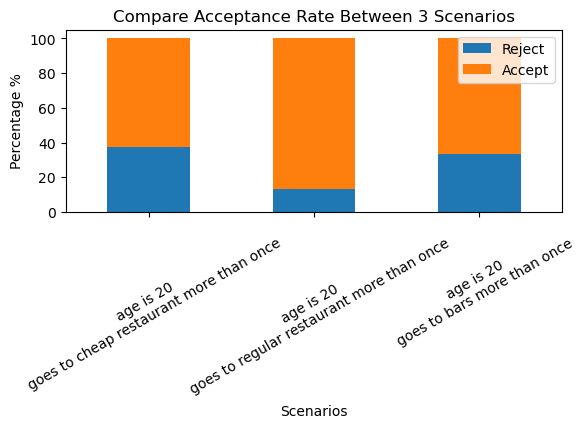

Y,0,1
scenario,,
age is 20\n goes to cheap restaurant more than once,37.65,62.35
age is 20\n goes to regular restaurant more than once,13.33,86.67
age is 20\n goes to bars more than once,33.33,66.67


In [148]:
# check if those going to restaurants or bars will likely go to coffee houses as well
coffeescenariodf4 = coffeecoupon.query("age == 20").query("RestaurantLessThan20 > 1").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
coffeescenariodf4['scenario'] = 'age is 20\n goes to cheap restaurant more than once'
coffeescenariodf5 = coffeecoupon.query("age == 20").query("Restaurant20To50 > 1").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
coffeescenariodf5['scenario'] = 'age is 20\n goes to regular restaurant more than once'
coffeescenariodf6 = coffeecoupon.query("age == 20").query("Bar > 1").groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
coffeescenariodf6['scenario'] = 'age is 20\n goes to bars more than once'

combined = pd.concat([coffeescenariodf4,coffeescenariodf5,coffeescenariodf6])
combined = combined[['scenario',0,1]]
combined = combined.set_index('scenario')
combined.plot(kind = 'bar', stacked = True, rot=30)

plt.xlabel ('Scenarios')
plt.ylabel ('Percentage %')
plt.title ('Compare Acceptance Rate Between 3 Scenarios')
plt.legend(['Reject','Accept'])
plt.subplots_adjust(bottom=0.5)
plt.savefig('images/acceptance_rate_coffeescene1.png')
plt.show ()

combined

If the driver is 20 years old and they go to restaurants or bars more than once per month, the chances of accepting the coupon is more than 50% but the highest percentage is if they go to a regular restaurant, 86.67%